# Millestone 1

Nama : Raditya Saputra

Batch : FTDS 007

# Library yang digunakan :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import scipy.stats as stats

# Data Loading

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Menampilkan 5 Data teratas

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Menampilkan 5 Data terbawah

In [4]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


# Menampilkan informasi Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Exploring dan Handling Data

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Data tidak memiliki missing value

In [7]:
# Merubah tipe data date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Manipulating kolom
df.rename(columns = {'Unit price' : 'Unit_price'}, inplace = True)

In [9]:
# Total revenue adalah seluruh pemasukan yang didapat dari semua saluran penjualan
df["revenue"] = df.Unit_price * df.Quantity

In [10]:
# Mengurutkan baris kolom 4 revenue tertinggi
df.sort_values('revenue', ascending=False)[:4]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit_price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,revenue
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.65,1042.65,2019-02-15,14:53,Credit card,993.0,4.761905,49.65,6.6,993.0
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.49,1039.29,2019-02-08,16:20,Credit card,989.8,4.761905,49.49,8.7,989.8
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.26,1034.46,2019-01-30,20:23,Ewallet,985.2,4.761905,49.26,4.5,985.2
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.75,1023.75,2019-01-12,16:18,Ewallet,975.0,4.761905,48.75,8.0,975.0


In [11]:
# rata-rata revenue yang diterima setiap branch untuk tipe kostumer normal pada seluruh produk yang dijual nya
normal = df[
    (df['Customer type'] == 'Normal') 
].groupby(['Branch','Customer type','Product line'])['revenue'].mean()
normal

Branch  Customer type  Product line          
A       Normal         Electronic accessories    301.196207
                       Fashion accessories       308.372069
                       Food and beverages        272.119655
                       Health and beauty         234.623200
                       Home and lifestyle        302.946129
                       Sports and travel         307.801333
B       Normal         Electronic accessories    327.435000
                       Fashion accessories       288.056667
                       Food and beverages        262.665238
                       Health and beauty         305.214815
                       Home and lifestyle        321.177586
                       Sports and travel         284.766250
C       Normal         Electronic accessories    300.436000
                       Fashion accessories       274.696061
                       Food and beverages        339.981333
                       Health and beauty         301.6

In [12]:
# rata-rata revenue yang diterima setiap branch untuk tipe kostumer member pada seluruh produk yang dijual nya
member = df[
    (df['Customer type'] == 'Member') 
].groupby(['Branch','Customer type','Product line'])['revenue'].mean()
member

Branch  Customer type  Product line          
A       Member         Electronic accessories    280.973548
                       Fashion accessories       300.544545
                       Food and beverages        291.528966
                       Health and beauty         278.740000
                       Home and lifestyle        351.717059
                       Sports and travel         317.798276
B       Member         Electronic accessories    261.899630
                       Fashion accessories       218.438437
                       Food and beverages        309.462069
                       Health and beauty         414.938462
                       Home and lifestyle        352.349524
                       Sports and travel         330.795333
C       Member         Electronic accessories    377.521500
                       Fashion accessories       358.388438
                       Food and beverages        345.435000
                       Health and beauty         307.2

# Measure of Central Tendency

Mean revenue

In [13]:
print(df['revenue'].mean())

307.58738


Median revenue

In [14]:
print(df['revenue'].median())

241.76


Mode revenue

In [15]:
print(df['revenue'].mode()[0])

83.08


# Measure of Variance

Range revenue

In [16]:
print(df['revenue'].max() - df['revenue'].min())

982.83


Variance revenue

In [17]:
print(df['revenue'].var())

54838.63765779339


Standard Deviation revenue

In [18]:
print(df['revenue'].std())

234.1765096199732


# Hypothesis Testing Two Sample Independent Two Tailed

Kita akan mengambil data rata-rata seluruh pemasukan yang didapat dari semua saluran penjualan oleh supermarket dari kostumer Normal dan Member pada seluruh Branch supermarket per ID

# Hypothesis dalam kasus tersebut

Apakah rata-rata seluruh pemasukan yang didapat dari semua saluran penjualan oleh supermarket tipe kostumer Normal dan Member : sama atau berbeda secara signifikan 

H0: μ_N = μ_M

H1: μ_N != μ_M

In [19]:
N = df[df['Customer type']=='Normal'][['Invoice ID','revenue']].groupby('Invoice ID').sum()
M = df[df['Customer type']=='Member'][['Invoice ID','revenue']].groupby('Invoice ID').sum()
print('Rata-rata seluruh pemasukan yang didapat dari semua saluran penjualan oleh supermarket dari kostumer Normal: {}'.format(np.round(N.revenue.mean())))
print('Rata-rata seluruh pemasukan yang didapat dari semua saluran penjualan oleh supermarket dari kostumer Member: {}'.format(np.round(M.revenue.mean())))

Rata-rata seluruh pemasukan yang didapat dari semua saluran penjualan oleh supermarket dari kostumer Normal: 303.0
Rata-rata seluruh pemasukan yang didapat dari semua saluran penjualan oleh supermarket dari kostumer Member: 312.0


In [20]:
t_stat, p_val = stats.ttest_ind(N,M)
print('P-value:',p_val[0])
print('t-statistics:',t_stat[0])  

P-value: 0.5343949596143598
t-statistics: -0.6215268724928263


P-value yang didapat sebesar 0.53 antara tipe kostumer Normal dengan Member yang berarti besar dari 0.05 critical value, berarti H0 diterima.

# Confidence Intervals

C:\Users\Silvi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Silvi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


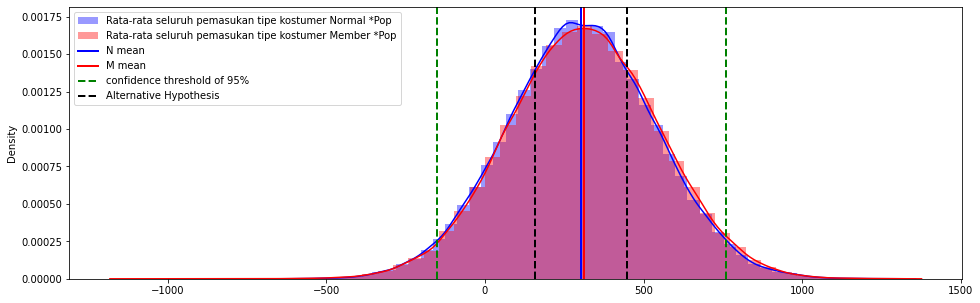

In [21]:
N_pop = np.random.normal(N.revenue.mean(),N.revenue.std(),100000)
M_pop = np.random.normal(M.revenue.mean(),M.revenue.std(),100000)

ci = stats.norm.interval(0.95,N.revenue.mean(),N.revenue.std())
plt.figure(figsize=(16,5))
sns.distplot(N_pop, label='Rata-rata seluruh pemasukan tipe kostumer Normal *Pop',color='blue')
sns.distplot(M_pop, label='Rata-rata seluruh pemasukan tipe kostumer Member *Pop',color='red')

plt.axvline(N.revenue.mean(), color='blue', linewidth=2, label='N mean')
plt.axvline(M.revenue.mean(), color='red',  linewidth=2, label='M mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(N_pop.mean()+t_stat[0]*N_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(N_pop.mean()-t_stat[0]*N_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

# Overall Analysis

Berdasarkan hasil di atas, dapat disimpulkan bahwa hipotesis nol diterima / H0: μ_N = μ_M
- dikarenakan P-value yang didapat sebesar 0.53 antara tipe kostumer Normal dengan Member, yang berarti besar dari 0.05 critical value nya dan dilihat. Plotnya menunjukkan garis hitam berada diantara garis mean (biru) dan garis confidence interval (hijau). Sehingga rata-rata seluruh pemasukan yang didapat dari semua saluran penjualan supermarket yang dibeli tipe kostumer Normal dan Member tidak berbeda secara signifikan.